In [1]:
import numpy as np
from scipy import linalg
from scipy import optimize
import sympy as sm

To start with we will base our analysis on a standard Solow-model with technology growth, which we will later expand with human capital. Afterwards we will look at diffrent shocks to the economy and analyze them. 

The Solow Model consists of the following four equations in descrete time indexed by $t\in\{0,1,\dots\}$

First lets define our variables. We have the following:

1. $ K_{t}= Capital$
2. $L_t = Labor$
3. $A_t = Technology$
4. $Y_t = F(K_t,A_t,L_t) = GDP$

Labour is defined as the size of the population that grow with the rate $n$ in each period:

$$L_{t+1} = (1+n)L_{t}$$

It is the households that supplys the labur $L_t$ exogenously and independant of wages.Households decide how much to save as a fraction of their income:
$$S_t = s Y_t$$
Consumption is the income, $Y_t$ minus savings, $S_t$:
$$C_t = Y_t - S_t = (1 - s)Y_t$$


Firms production is desribed with a cobb douglas production function. It uses the inputs capital, $K_t$; labour, $L_t$ and technology, $A_t$

$$Y_{t} = K_{t}^\alpha(A_{t}L_{t})^{1-\alpha}$$

Capital accumulates at the saving rate and depreciates at the depreciation rate, $\delta$, which is exogenously given:
$$K_{t+1} = sY_{t}+(1-\delta)K_{t}$$

Technology grows with the rate of $g$.
$$A_{t+1} = (1+g)A_t$$

## Numerical solution and analysis 

We now find the transistion equation for kapital:

$$ \tilde{k}_{t+1} = \frac{1}{(1+n)(1+g)}(s \tilde{k}_t^\alpha+ (1-\delta)\tilde{k}_t)$$

Substracting capital and human capital in period t, gives us the solow equations:
$$ \tilde{k}_{t+1} - \tilde{k}_{t} = \frac{1}{(1+n)(1+g)}(s\tilde{k}_t^\alpha - (n + g + \delta + ng)\tilde{k}_t)$$

The steady state is given by:  

$$ 0 = \frac{1}{(1+n)(1+g)}(s\tilde{k}_t^\alpha - (n + g + \delta + ng)\tilde{k}_t)$$

Here the change in capital and human capital is zero

Here we have two equations with two unknowns that yields: 

$$ \tilde{k}^* = \frac{s}{n+g+\delta+ng}^\frac{1}{1-\alpha}$$

Income is then: 

$$\tilde{y}^* = (\tilde{k}^*)^\alpha = \frac{s}{n+g+\delta+ng}^\frac{\alpha}{1-\alpha}$$

First we define our parameters

In [2]:
k = sm.symbols('k')
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
s = sm.symbols('s')
g = sm.symbols('g')
n = sm.symbols('n')

From this we can write up our steady-state as code and solve for $ {k}^{\ast}$ with sympy

In [3]:
f=k**alpha
ss=sm.Eq(k,(s*f+(1-delta)*k)/((1+n)*(1+g)))
kss=sm.solve(ss,k)[0]
kss

((delta + g*n + g + n)/s)**(1/(alpha - 1))

Now we want to look at the capital accumaltion and how it reacts to a shock. We simualate a shoch were 50% of the capital is lost. This could be due to a earthquke or similar events. The equation we look at is
$$ \tilde{k}_{t+1} = \frac{1}{(1+n)(1+g)}(s \tilde{k}_t^\alpha+ (1-\delta)\tilde{k}_t)$$

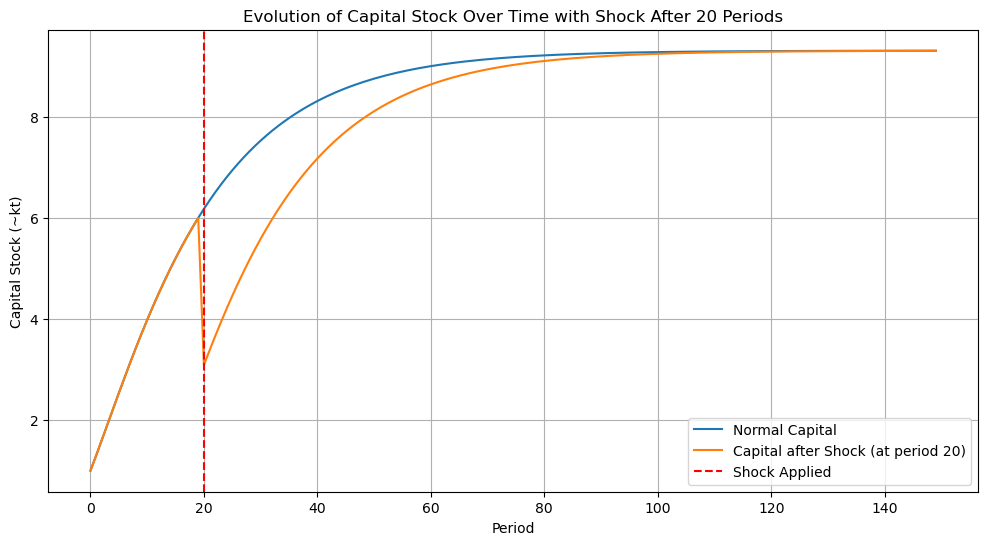

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 1/3
n = 0.02
g = 0.02
s = 0.4
delta = 0.05

# Simulation setup
periods = 150
threshold = 0.01 

def next_period_capital(k_tilde, s, alpha, delta, n, g):
    return (1 / ((1 + n) * (1 + g))) * (s * k_tilde**alpha + (1 - delta) * k_tilde)

# Initialize capital arrays
k_tilde_normal = np.zeros(periods)
k_tilde_shock = np.zeros(periods)
k_tilde_normal[0] = 1
k_tilde_shock[0] = 1

# Simulate the evolution of capital
for t in range(1, periods):
    k_tilde_normal[t] = next_period_capital(k_tilde_normal[t-1], s, alpha, delta, n, g)
    # Apply a 50% shock to the capital after 20 periods
    if t == 20:
        k_tilde_shock[t] = next_period_capital(k_tilde_shock[t-1], s, alpha, delta, n, g) * 0.5
    else:
        k_tilde_shock[t] = next_period_capital(k_tilde_shock[t-1], s, alpha, delta, n, g)

# Plotting the results with the shock after 20 periods
plt.figure(figsize=(12, 6))
plt.plot(k_tilde_normal, label='Normal Capital')
plt.plot(k_tilde_shock, label='Capital after Shock (at period 20)')
plt.axvline(x=20, color='red', linestyle='--', label='Shock Applied')
plt.xlabel('Period')
plt.ylabel('Capital Stock (\u007Ekt)')
plt.title('Evolution of Capital Stock Over Time with Shock After 20 Periods')
plt.legend()
plt.grid(True)
plt.show()



Above we have illustratede the normal capital without a shock and the capital with a shock after 20 periodes. Now we want to see how fast th capital will converganve towards the normal capital. In this sceanario we have decide to say the onvergence is complete when capital after the shock is within 1% of the capital without the shock

In [5]:
# Finding the convergenstime when the valus are within 1% of eachother

def find_convergence_time(k_normal, k_shock, threshold, start_period):
    for t in range(start_period, len(k_normal)):
        if np.abs(k_normal[t] - k_shock[t]) < threshold * k_normal[t]:
            return t
    return None

convergence_time = find_convergence_time(k_tilde_normal, k_tilde_shock, threshold, start_period=21)

print("The convergence time within a treshold of 1% is",convergence_time, "periods")


The convergence time within a treshold of 1% is 84 periods


As we can see, after 110 periode the capital is within 1% of the capital without shock. Which means the capital has as convergence time of 110 periods in our model

Now we will look at nummerical solution for the steady state

In [6]:
f = lambda k: k**alpha
obj_kss = lambda kss: kss - (s*f(kss) + (1-delta)*kss)/((1+g)*(1+n))
result = optimize.root_scalar(obj_kss,bracket=[0.1,100],method='brentq')
print('the steady state for k is',result.root) 

the steady state for k is 9.307592077691593


In [19]:
gs = [0.01,0.02,0.03,0.04,0.05,0.06]

# write your code here
for g in gs:
    f = lambda k: k**alpha
    obj_kss = lambda kss: kss - (s*f(kss) + (1-delta)*kss)/((1+g)*(1+n))
    result = optimize.root_scalar(obj_kss,bracket=[0.1,100],method='brentq')
    print(f'for g = {g:.3f} the steady state for k is',result.root) 

for g = 0.010 the steady state for k is 11.138544251459978
for g = 0.020 the steady state for k is 9.307592077691593
for g = 0.030 the steady state for k is 7.928536245347426
for g = 0.040 the steady state for k is 6.859308666574738
for g = 0.050 the steady state for k is 6.010518407212418
for g = 0.060 the steady state for k is 5.323401644585044


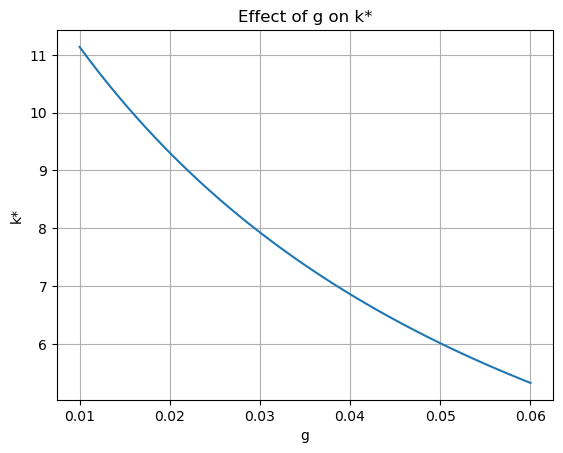

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# List of g values to test
gs = np.linspace(0.01, 0.06, 100)  # Create a range of g values

# Lists to store k_star values for each g
k_stars = []

# Loop through each g value and compute the steady-state for k
for g in gs:
    f = lambda k: k**alpha
    obj_kss = lambda kss: kss - (s*f(kss) + (1-delta)*kss)/((1+g)*(1+n))
    result = optimize.root_scalar(obj_kss, bracket=[0.1, 100], method='brentq')
    k_star = result.root
    k_stars.append(k_star)
    

# Plot the results
plt.plot(gs, k_stars)
plt.xlabel('g')
plt.ylabel('k*')
plt.title('Effect of g on k*')
plt.grid(True)
plt.show()


# Extension with human capital 

The Solow Model with human capital makes the following changes to the extisting model:

Households now decide how much to save in order to buy both capital and human capital:
$$S_t = (s_K + s_H)Y_t$$
Consumption is still income, $Y_t$ minus savings, $S_t$:
$$C_t = Y_t - S_t = (1 - s_K - s_H)Y_t$$

Firms still produce with a cobb douglas production function. They use the inputs, capital, $K_t$; labour, $L_t$; technology, $A_t$ and human capital, $H_t$.

$$Y_{t} = K_{t}^\alpha H_{t}^\phi (A_{t}L_{t})^{1-\alpha-\phi}$$

Capital and human capital still accumulates at the saving rate and depreciates at the depreciation rate, $\delta$, which is exogenously given:
$$K_{t+1} = s_{K}Y_{t}+(1-\delta)K_{t}$$
$$H_{t+1} = s_{H}Y_{t}+(1-\delta)H_{t}$$

We can find the transistion equation for kapital and human capital:

$$ \tilde{k}_{t+1} = \frac{1}{(1+n)(1+g)}(s_K \tilde{k}_t^\alpha \tilde{h}_t^\phi + (1-\delta)\tilde{k}_t$$
$$ \tilde{h}_{t+1} = \frac{1}{(1+n)(1+g)}(s_H \tilde{k}_t^\alpha \tilde{h}_t^\phi + (1-\delta)\tilde{h}_t$$

By substracting capital and human capital in period t, we get the solow equations:
$$ \tilde{k}_{t+1} - \tilde{k}_{t} = \frac{1}{(1+n)(1+g)}(s_K \tilde{k}_t^\alpha \tilde{h}_t^\phi - (n + g + \delta + ng)\tilde{k}_t$$
$$ \tilde{h}_{t+1} - \tilde{h}_{t} = \frac{1}{(1+n)(1+g)}(s_H \tilde{k}_t^\alpha \tilde{h}_t^\phi - (n + g + \delta + ng)\tilde{h}_t$$

This gives ud the steady state:

$$ 0 = \frac{1}{(1+n)(1+g)}(s_K \tilde{k}_t^\alpha \tilde{h}_t^\phi - (n + g + \delta + ng)\tilde{k}_t$$
$$ 0 = \frac{1}{(1+n)(1+g)}(s_H \tilde{k}_t^\alpha \tilde{h}_t^\phi - (n + g + \delta + ng)\tilde{h}_t$$

The change in capital and human capital is zero:

Here we have two equations with two unknowns that yeilds: 

$$ \tilde{k}^* = \frac{s_K^{1-\phi}s_H^\phi}{n+g+\delta+ng}^\frac{1}{1-\alpha-\phi}$$
$$ \tilde{h}^* = \frac{s_K^{\alpha}s_H^{1-\alpha}}{n+g+\delta+ng}^\frac{1}{1-\alpha-\phi}$$

Income is then: 

$$\tilde{y}^* = (\tilde{k}^*)^\alpha (\tilde{h}^*)^\phi$$
$$= \frac{s_K}{n+g+\delta+ng}^\frac{\alpha}{1-\alpha-\phi} \frac{s_H}{n+g+\delta+ng}^\frac{\phi}{1-\alpha-\phi}$$

Parameters:

In [7]:
phi = sm.symbols('phi')
s_k = sm.symbols('s_k')
s_h = sm.symbols('s_h')


phi = 1/3
s_k = 0.2
s_h = 0.3

Now we solve steady state for both human capital and capital numerical by using fsolve from scipy.optimize The equations we solve are the following:
$$ \tilde{k}^* = \frac{s_K^{1-\phi}s_H^\phi}{n+g+\delta+ng}^\frac{1}{1-\alpha-\phi}$$
$$ \tilde{h}^* = \frac{s_K^{\alpha}s_H^{1-\alpha}}{n+g+\delta+ng}^\frac{1}{1-\alpha-\phi}$$

In [30]:
import numpy as np
from scipy.optimize import fsolve

alpha = 1/3
n = 0.02
g = 0.02
s = 0.4
delta = 0.05

phi = 1/3
s_k = 0.2
s_h = 0.3

# Define the system of equations using lambda functions
def compute_steady_state(g):
    equations = lambda vars: [
        vars[0] - ((s_k**(1-phi)) * (s_h**phi) / (n + g + delta + n*g)) * (1 / (1 - alpha - phi)),
        vars[1] - ((s_k**alpha) * (s_h**(1-alpha)) / (n + g + delta + n*g)) * (1 / (1 - alpha - phi))
]

# Initial guesses for k and h
initial_guesses = [0.5, 0.5]

# Solve the equations
k_star, h_star = fsolve(equations, initial_guesses)

print(f'Steady state for k* is {k_star}')
print(f'Steady state for h* is {h_star}')


Steady state for k* is 7.597660901902643
Steady state for h* is 8.697150644498548


In [27]:
import numpy as np
from scipy.optimize import fsolve

gs = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06]

for g in gs:
    equations = lambda vars: [
        vars[0] - ((s_k**(1-phi)) * (s_h**phi) / (n + g + delta + n*g)) * (1 / (1 - alpha - phi)),
        vars[1] - ((s_k**alpha) * (s_h**(1-alpha)) / (n + g + delta + n*g)) * (1 / (1 - alpha - phi))
    ]
    initial_guesses = [0.5, 0.5]
    k_star, h_star = fsolve(equations, initial_guesses)
    k_stars.append(k_star)
    print(f'For g = {g:.3f}, Steady state for k* is {k_star:.4f}, h* is {h_star:.4f}')
   
    plt.show()



For g = 0.010, Steady state for k* is 8.5639, h* is 9.8033
For g = 0.020, Steady state for k* is 7.5977, h* is 8.6972
For g = 0.030, Steady state for k* is 6.8273, h* is 7.8153
For g = 0.040, Steady state for k* is 6.1988, h* is 7.0959
For g = 0.050, Steady state for k* is 5.6763, h* is 6.4977
For g = 0.060, Steady state for k* is 5.2350, h* is 5.9925


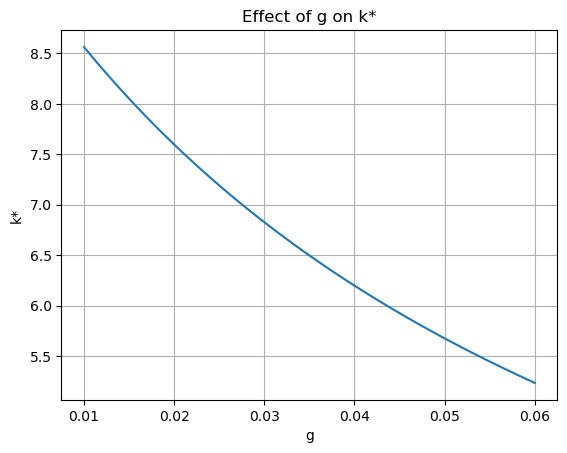

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve


# List of g values to test
gs = np.linspace(0.01, 0.06, 100)  # Create a range of g values

# Lists to store k_star values for each g
k_stars = []

# Loop through each g value and compute the steady-state for k
for g in gs:
    equations = lambda vars: [
        vars[0] - ((s_k**(1-phi)) * (s_h**phi) / (n + g + delta + n*g)) * (1 / (1 - alpha - phi)),
        vars[1] - ((s_k**alpha) * (s_h**(1-alpha)) / (n + g + delta + n*g)) * (1 / (1 - alpha - phi))
    ]
    initial_guesses = [0.5, 0.5]
    k_star, _ = fsolve(equations, initial_guesses)
    k_stars.append(k_star)

# Plot the results
plt.plot(gs, k_stars)
plt.xlabel('g')
plt.ylabel('k*')
plt.title('Effect of g on k*')
plt.grid(True)
plt.show()


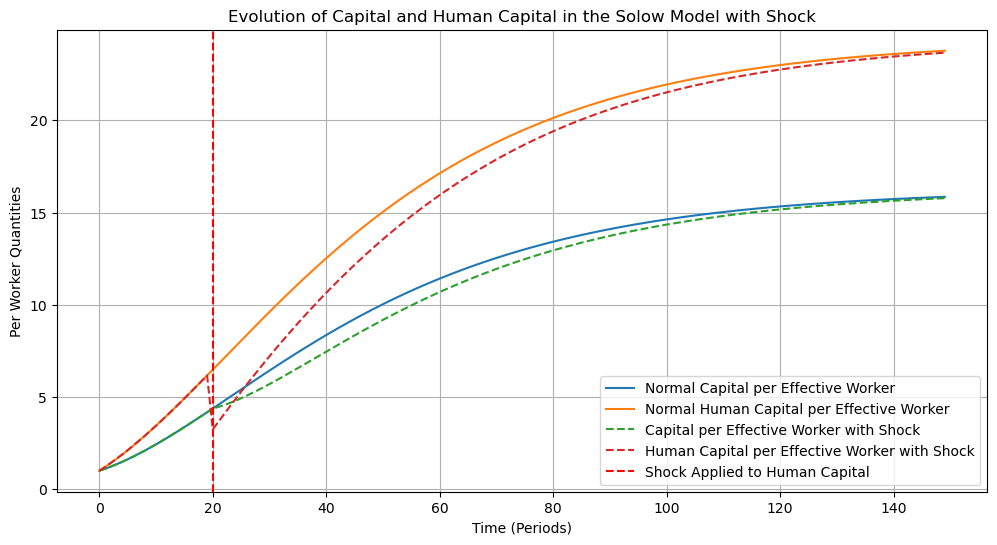

In [9]:
import numpy as np
import matplotlib.pyplot as plt



# Simulation setup
periods = 150
threshold_human = 0.01

def next_period_k(k_tilde, h_tilde, s_k, alpha, phi, delta, n, g):
    return ((s_k * k_tilde**alpha * h_tilde**phi) + (1 - delta) * k_tilde) / ((1 + n) * (1 + g))

def next_period_h(k_tilde, h_tilde, s_h, alpha, phi, delta, n, g):
    return ((s_h * k_tilde**alpha * h_tilde**phi) + (1 - delta) * h_tilde) / ((1 + n) * (1 + g))

# Initialize arrays for capital and human capital
k_tilde_new = np.zeros(periods)
h_tilde_new = np.zeros(periods)
k_tilde_new_shock = np.zeros(periods)
h_tilde_new_shock = np.zeros(periods)

k_tilde_new[0], h_tilde_new[0] = 1, 1  # Start with normalized values
k_tilde_new_shock[0], h_tilde_new_shock[0] = 1, 1   # Start with normalized values

# Simulate the evolution of capital and human capital
for t in range(1, periods):
    k_tilde_new[t] = next_period_k(k_tilde_new[t-1], h_tilde_new[t-1], s_k, alpha, phi, delta, n, g)
    h_tilde_new[t] = next_period_h(k_tilde_new[t-1], h_tilde_new[t-1], s_h, alpha, phi, delta, n, g)
    
    # Compute next values for the shock scenario
    k_tilde_new_shock[t] = next_period_k(k_tilde_new_shock[t-1], h_tilde_new_shock[t-1], s_k, alpha, phi, delta, n, g)
    h_tilde_new_shock[t] = next_period_h(k_tilde_new_shock[t-1], h_tilde_new_shock[t-1], s_h, alpha, phi, delta, n, g)
    
    # Apply a 20% shock to human capital after 20 periods
    if t == 20:
        h_tilde_new_shock[t] *= 0.50

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(k_tilde_new, label='Normal Capital per Effective Worker')
plt.plot(h_tilde_new, label='Normal Human Capital per Effective Worker')
plt.plot(k_tilde_new_shock, '--', label='Capital per Effective Worker with Shock')
plt.plot(h_tilde_new_shock, '--', label='Human Capital per Effective Worker with Shock')
plt.axvline(x=20, color='red', linestyle='--', label='Shock Applied to Human Capital')
plt.xlabel('Time (Periods)')
plt.ylabel('Per Worker Quantities')
plt.title('Evolution of Capital and Human Capital in the Solow Model with Shock')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
def find_convergence_time_new(k_tilde_new, k_tilde_new_shock, threshold_human, start_period_new):
    
    for t in range(start_period_new, len(k_tilde_new)):
        if np.abs(k_tilde_new[t] - k_tilde_new_shock[t]) < threshold_human * k_tilde_new[t]:
            return t
    return None

# Assuming you've already run your simulation and filled up k_tilde_new and k_tilde_new_shock
convergence_time_new = find_convergence_time_new(k_tilde_new, k_tilde_new_shock, threshold_human, start_period_new=21)
print(f"The convergence time within a threshold of {threshold_human*100}% is {convergence_time} periods.")


The convergence time within a threshold of 1.0% is 84 periods.
